Mini-Project : Global warming

Sarina Borisuit     6510422014

Pinyawat Sabsanhor  6510422021

Import Library

In [46]:
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#library for plot geomap
import geopandas
import mapclassify

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn')   # 'default', 'seaborn'

import seaborn as sns
sns.set()  # Plot using the seaborn style

Transform data by load file, merge file, cleansing

In [47]:
# Load dataset

df_production = pd.read_csv('https://raw.githubusercontent.com/Hellper1/DADS_5001_miniproject/main/dataset/electricity-production-by-source.csv')
df_consumption = pd.read_csv('https://raw.githubusercontent.com/Hellper1/DADS_5001_miniproject/main/dataset/energy-consumption-by-source-and-country.csv')
df_co2 = pd.read_csv('https://raw.githubusercontent.com/Hellper1/DADS_5001_miniproject/main/dataset/annual-co2-emissions-per-country.csv')
df_co2_capita = pd.read_csv('https://raw.githubusercontent.com/Hellper1/DADS_5001_miniproject/main/dataset/co-emissions-per-capita.csv')
df_temp2 = pd.read_csv('https://raw.githubusercontent.com/Hellper1/DADS_5001_miniproject/main/dataset/FAOSTAT_data_en_2-12-2023_country_region.csv')

In [48]:
# Merge file

df_energy = df_production.merge(df_consumption, how='right',on=['Entity','Code','Year']).merge(df_co2, how='left', on=['Entity','Code','Year']).merge(df_temp2, how='left', on=['Entity','Code','Year'])
df_energy.rename(columns = {"Value":"Temp"},inplace=True)

In [49]:
#select year 2000 to 2020
indexYear = df_energy[ (df_energy['Year'] < 2000) | (df_energy['Year'] > 2020)].index
df_energy.drop(indexYear, inplace=True)

In [50]:
#delete Entity that contains BP
discard = ["BP","USSR","European Union","income"]
df = df_energy[~df_energy.Entity.str.contains('|'.join(discard))].reset_index(drop=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 23 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            1806 non-null   object 
 1   Code                                              1680 non-null   object 
 2   Year                                              1806 non-null   int64  
 3   Electricity from coal (TWh)                       1806 non-null   float64
 4   Electricity from gas (TWh)                        1806 non-null   float64
 5   Electricity from nuclear (TWh)                    1806 non-null   float64
 6   Electricity from hydro (TWh)                      1806 non-null   float64
 7   Electricity from solar (TWh)                      1806 non-null   float64
 8   Electricity from oil (TWh)                        1806 non-null   float64
 9   Electricity from wi

สถานการณ์อุณหภูมิโลก ตั้งแต่ปี 2000 ถึง 2020

plot avg temperature change from 1980 with 95% CI

([<matplotlib.axis.XTick at 0x1d48ff08340>,
 [Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2022.5, 0, '2022.5'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

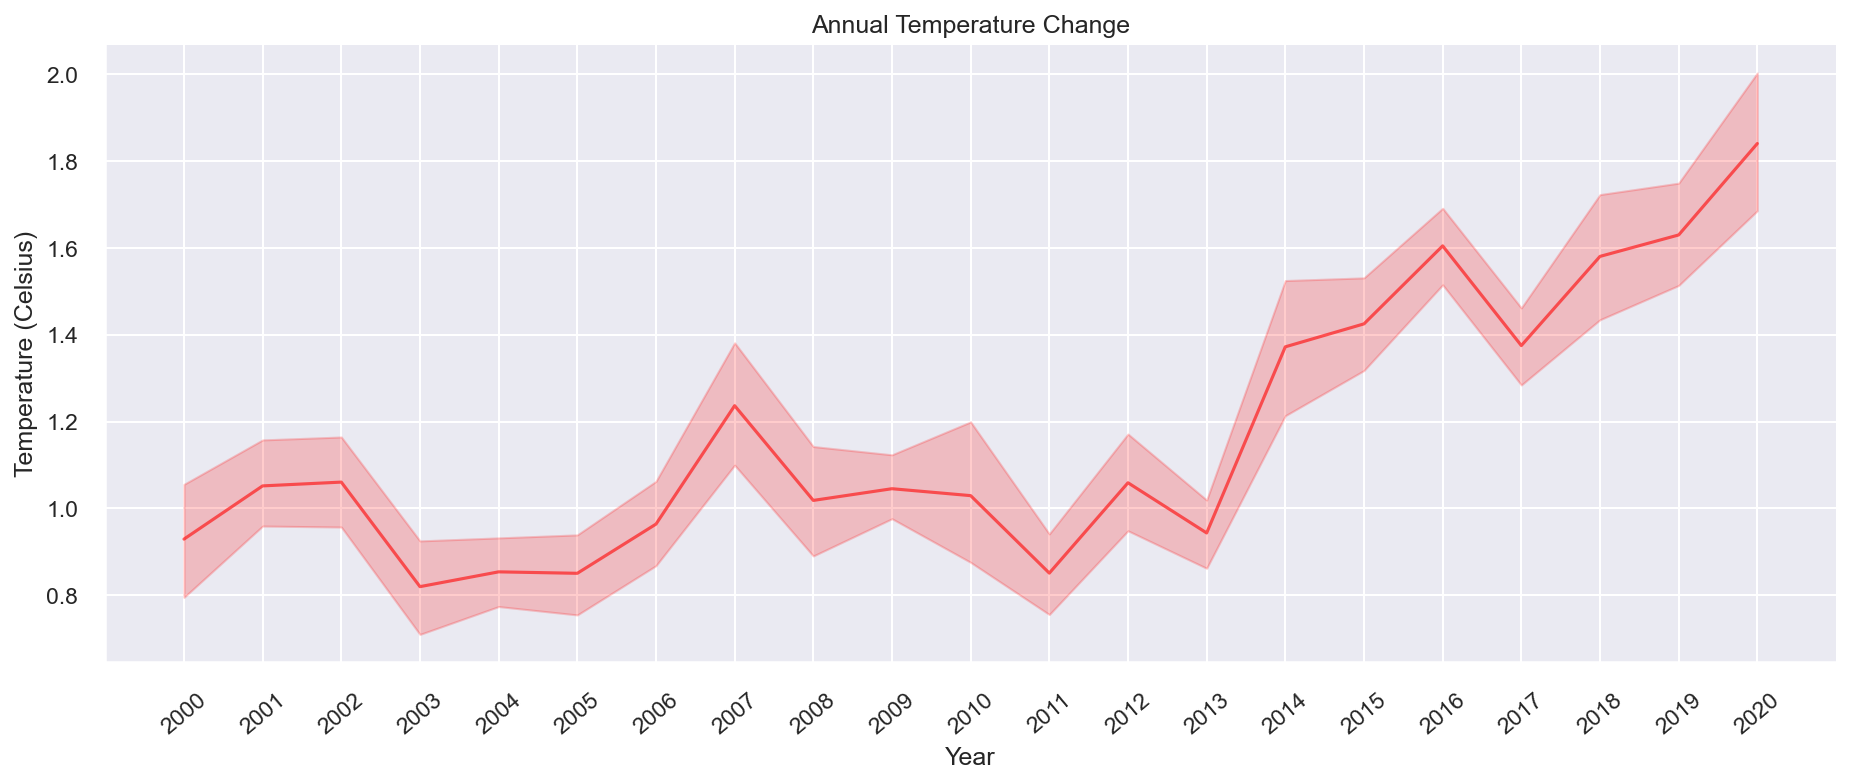

In [52]:
df_data = df.copy()

#Remove region and world
df_data = df_data[df_data['Code'].notnull()]
df_data = df_data[~df_data['Code'].isin(['NaN','OWID_WRL'])]

sns.set(rc={'figure.dpi':150})

sns.relplot( kind='line',
             data=df_data, 
             x='Year', y='Temp',
             height=5, aspect=2.5,
             alpha=0.6,
             color = 'Red'
          ).set(xlabel='Year',ylabel='Temperature (Celsius)',title='Annual Temperature Change')

plt.xticks(np.arange(2000, 2021, 1),rotation=40)

สถานการณ์อุณหภูมิโลกแต่ละประเทศในปี 2020
โดยนำ temperature ปัจจุบันของแต่ละประเทศ map ลง polygon

In [53]:
#Import dataset
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
temp = df_temp2.copy()

#select year 2020
temp = temp.loc[temp['Year']==2020]

#merge temp with geomap
temp.rename(columns = {'Code':'iso_a3'},inplace=True)
world = world.merge(temp, how='left',on=['iso_a3'])

[Text(0.5, 234.57083333333347, ''),
 Text(90.14106906285905, 0.5, ''),
 Text(0.5, 1.0, 'Overall temperature change')]

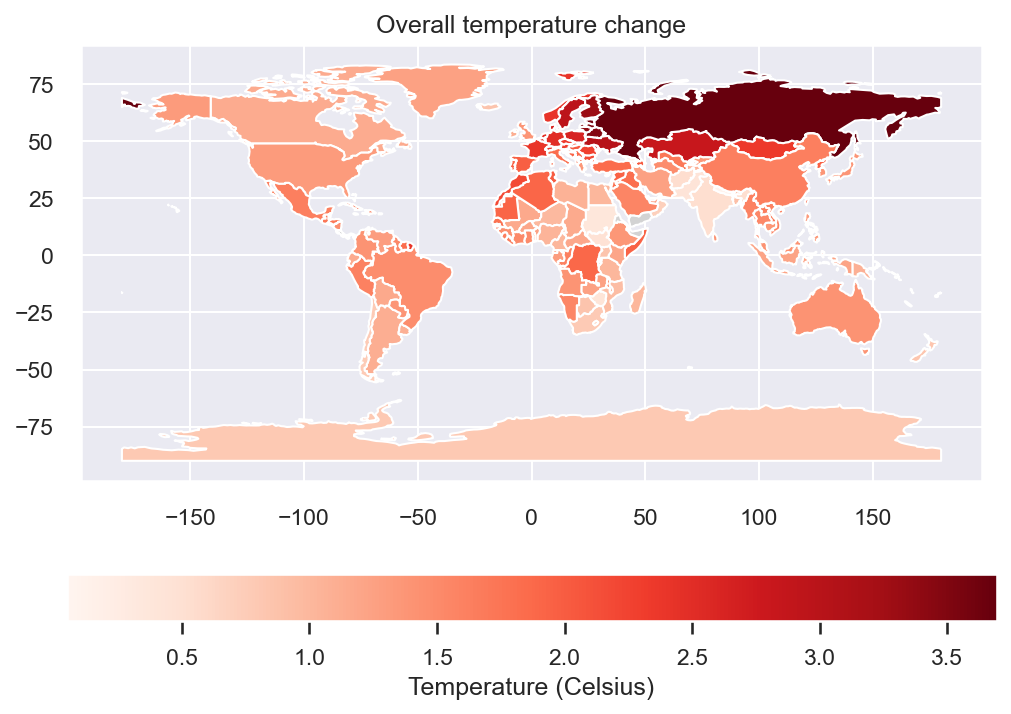

In [54]:
fig, ax = plt.subplots(1, 1)

world.plot(column='Value',
           missing_kwds={'color': 'lightgrey'}, #missing data will be grey color
           cmap='Reds',
           #scheme='percentiles',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Temperature (Celsius)",
                        'orientation': "horizontal"}
            ).set(xlabel=None,ylabel=None,title='Overall temperature change')

คงทราบกันดีแล้วว่าสาเหตุที่โลกร้อนเกิดจากสถานการณ์การแพร่กระจายของก๊าซคาร์บอนไดออกไซด์ 

จึงพิจารณาการเปรียบเทียบการปล่อยก๊าซคาร์บอนไดออกไซด์ของแต่ละทวีป ในช่วงปี 2000 ถึง 2020

มีการใช้ maker เพื่อให้ง่ายต่อการดูกราฟ และเป็น scale เป็น log scale

([<matplotlib.axis.XTick at 0x1d4900a6a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

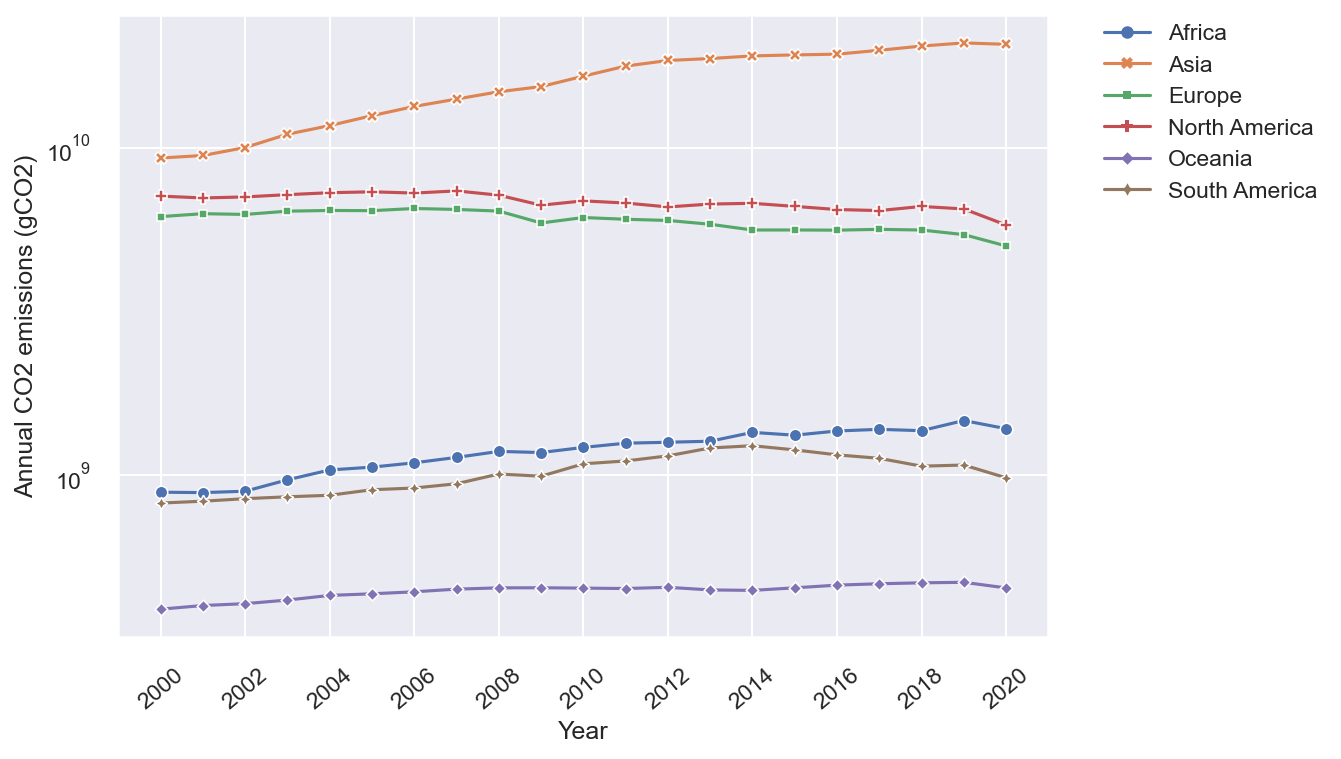

In [55]:
#Plot CO2 emissions by region
df_data = df.copy()
select = ["Africa","Asia","Europe","North America","South America","Oceania"]

sns.lineplot(
    data=df_data.loc[df_data['Entity'].isin(select),(['Entity','Year',"Annual CO2 emissions"])],
    x='Year',y='Annual CO2 emissions',
    hue='Entity',
    style="Entity",
    markers=True, dashes=False,
    
).set_yscale("log")

#setting label
plt.ylabel("Annual CO2 emissions (gCO2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(2000, 2021, 2),rotation=40)

เปรียบเทียบการปล่อยก๊าซคาร์บอนไดออกไซด์ของแต่ประเทศในแต่ละทวีป ในช่วงปี 2000 ถึง 2020

โดย plot เป็น subplot ซึ่งกราฟด้านซ้ายเป็นการปล่อยก๊าซสะสม และกราฟด้านขวาเป็นการปล่อยก๊าซรายปี

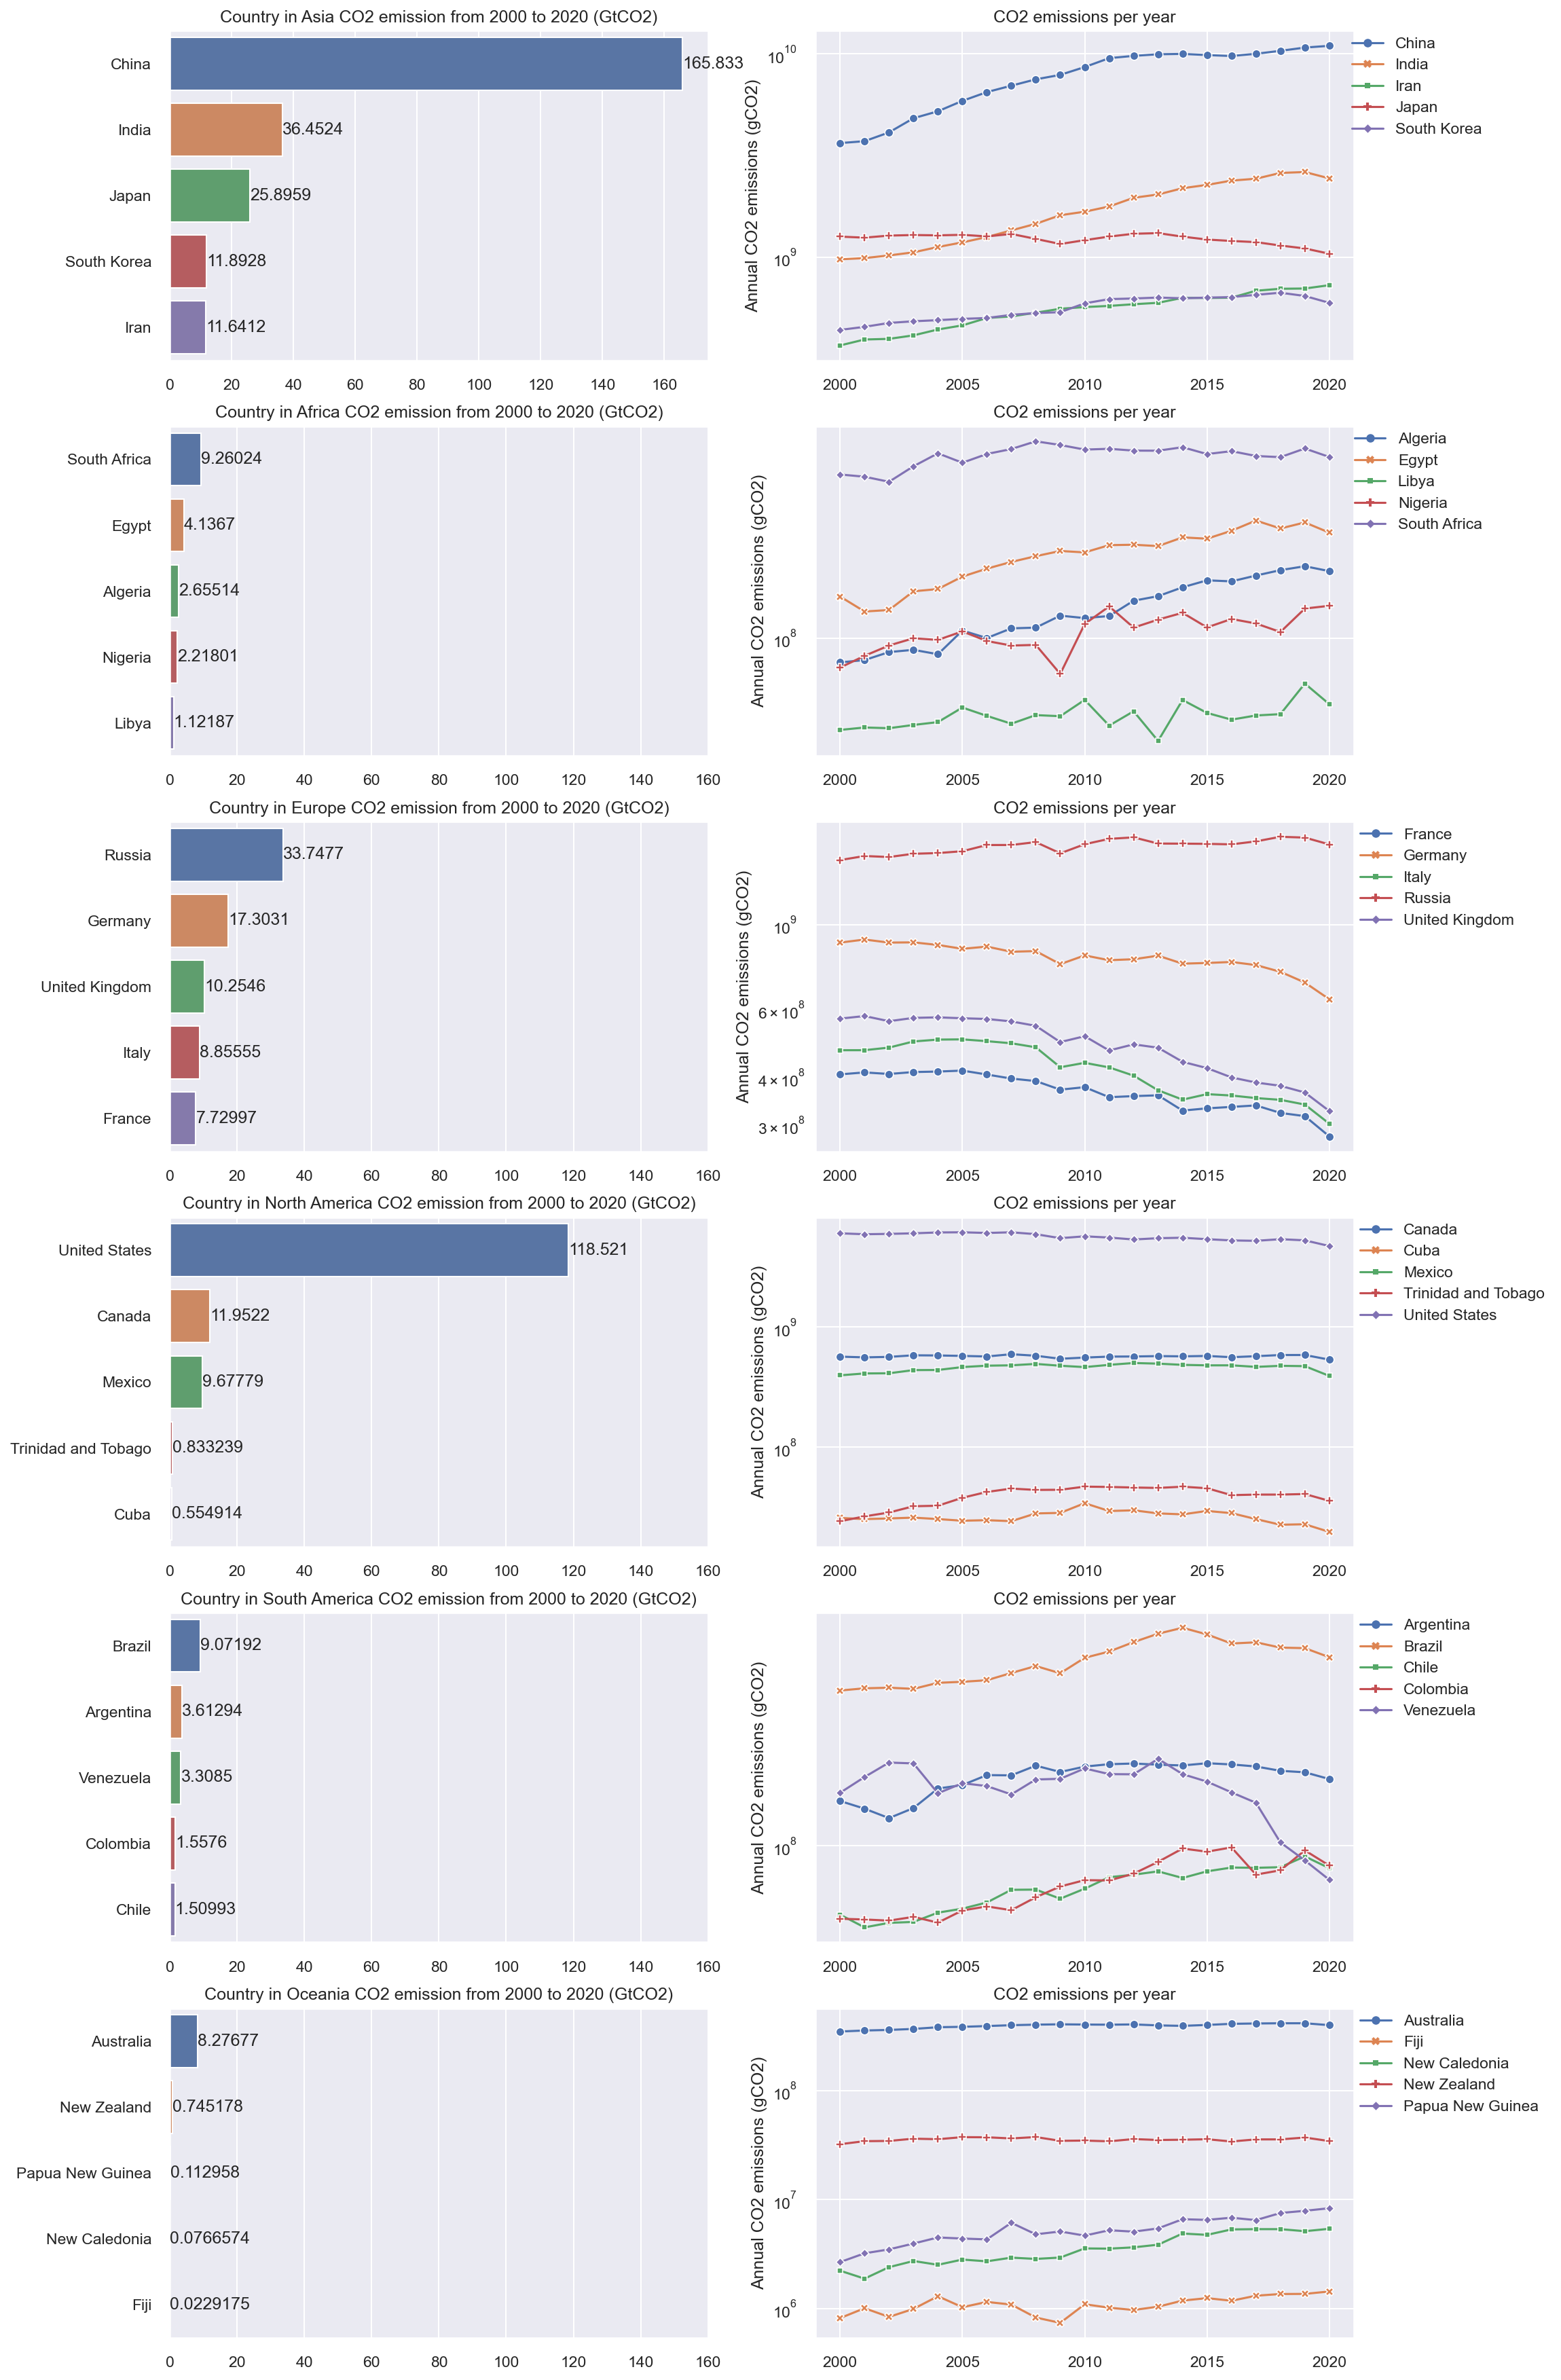

In [56]:
#select data CO2 between 2000 to 2020
co2 = df_co2.copy()
indexYear = co2[ (co2['Year'] < 2000) | (co2['Year'] > 2020)].index
co2.drop(indexYear, inplace=True)

#List country each region
africa_lst = ['ZAF',	'EGY',	'DZA',	'NGA',	'MAR',	'LBY',	'TUN',	'AGO',	'SDN',	'KEN',	'GHA',	
            'ETH',	'ZWE',	'TZA',	'CIV',	'SEN',	'CMR',	'GNQ',	'BWA',	'MOZ',	'GAB',	'BEN',	
            'COG',	'ZMB',	'UGA',	'BFA',	'NAM',	'MDG',	'MLI',	'GIN',	'MRT',	'COD',	'LSO',	
            'TGO',	'NER',	'TCD',	'SSD',	'MWI',	'LBR',	'RWA',	'SWZ',	'SLE',	'ERI',	'SOM',	
            'GMB',	'BDI',	'DJI',	'GNB',	'CAF',	'ESH',	'SOL']
asia_lst = ['CHN',	'IND',	'JPN',	'IRN',	'KOR',	'SAU',	'IDN',	'TUR',	'KAZ',	'THA',	'TWN',	
            'MYS',	'VNM',	'ARE',	'PAK',	'IRQ',	'PHL',	'UZB',	'KWT',	'QAT',	'BGD',	'TKM',	
            'OMN',	'ISR',	'PRK',	'MNG',	'AZE',	'SYR',	'JOR',	'LBN',	'MMR',	'LKA',	'YEM',	
            'LAO',	'KHM',	'AFG',	'KGZ',	'NPL',	'GEO',	'BRN',	'CYP',	'TJK',	'ARM',	'PSE',	
            'BTN',	'TLS',	'CYN',]
europe_lst = ['RUS',	'DEU',	'GBR',	'ITA',	'FRA',	'POL',	'ESP',	'UKR',	'NLD',	'CZE',	'BEL',	
              'ROU',	'GRC',	'AUT',	'BLR',	'PRT',	'HUN',	'FIN',	'BGR',	'SRB',	'NOR',	'SWE',	
              'CHE',	'IRL',	'DNK',	'SVK',	'BIH',	'HRV',	'EST',	'SVN',	'LTU',	'LUX',	'MKD',	
              'LVA',	'ALB',	'MDA',	'ISL',	'MNE',]
northame_lst = ['USA',	'CAN',	'MEX',	'TTO',	'CUB',	'DOM',	'GTM',	'PAN',	'HND',	'JAM',	'CRI',	
                'SLV',	'NIC',	'HTI',	'BHS',	'BLZ',	'GRL',]
southame_lst = ['BRA',	'ARG',	'VEN',	'COL',	'CHL',	'PER',	'ECU',	'BOL',	'URY',	'PRY',	'SUR',	'GUY',]
oceania_lst = ['AUS',	'NZL',	'PNG',	'NCL',	'FJI',	'SLB',	'VUT',]


#Sort data by Annual CO2 emissions
rank = co2[['Entity','Code','Year',"Annual CO2 emissions"]].groupby(['Entity','Code']).sum().sort_values('Annual CO2 emissions', ascending=False).reset_index()
rank['Annual CO2 emissions'] = rank['Annual CO2 emissions'] / (10**9)
rank.dropna(axis=0)


#Setup subplot
fig, ((axes1,axes2),(axes3,axes4),(axes5,axes6),(axes7,axes8),(axes9,axes10),(axes11,axes12)) = plt.subplots(6, 2, figsize=(15, 30))

#Plot Asia infomation about accumulate CO2 and emission per year
asia = rank.loc[rank['Code'].isin(asia_lst),(['Entity','Year','Annual CO2 emissions','Code'])]
sns.barplot(data=asia.head(5), x="Annual CO2 emissions", y="Entity", ax=axes1).set(xlabel=None,ylabel=None,title='Country in Asia CO2 emission from 2000 to 2020 (GtCO2)')
sns.lineplot(
    data=co2.loc[co2['Entity'].isin(['China','India','Japan','South Korea','Iran']),(['Entity','Year',"Annual CO2 emissions"])],
    x='Year',y='Annual CO2 emissions',
    hue='Entity',
    style="Entity",
    markers=True, dashes=False,
    ax=axes2,
).set(yscale='log', xlabel=None, ylabel='Annual CO2 emissions (gCO2)', title='CO2 emissions per year')

#Plot Africa infomation about accumulate CO2 and emission per year
africa = rank.loc[rank['Code'].isin(africa_lst),(['Entity','Year','Annual CO2 emissions','Code'])]
sns.barplot(data=africa.head(5), x="Annual CO2 emissions", y="Entity", ax=axes3).set(xlabel=None,ylabel=None,title='Country in Africa CO2 emission from 2000 to 2020 (GtCO2)')
sns.lineplot(
    data=co2.loc[co2['Entity'].isin(['South Africa','Egypt','Algeria','Nigeria','Libya']),(['Entity','Year',"Annual CO2 emissions"])],
    x='Year',y='Annual CO2 emissions',
    hue='Entity',
    style="Entity",
    markers=True, dashes=False,
    ax=axes4,
).set(yscale='log', xlabel=None, ylabel='Annual CO2 emissions (gCO2)', title='CO2 emissions per year')

#Plot Europe infomation about accumulate CO2 and emission per year
europe = rank.loc[rank['Code'].isin(europe_lst),(['Entity','Year','Annual CO2 emissions','Code'])]
sns.barplot(data=europe.head(5), x="Annual CO2 emissions", y="Entity", ax=axes5).set(xlabel=None,ylabel=None,title='Country in Europe CO2 emission from 2000 to 2020 (GtCO2)')
sns.lineplot(
    data=co2.loc[co2['Entity'].isin(['Russia','Germany','United Kingdom','Italy','France']),(['Entity','Year',"Annual CO2 emissions"])],
    x='Year',y='Annual CO2 emissions',
    hue='Entity',
    style="Entity",
    markers=True, dashes=False,
    ax=axes6,
).set(yscale='log', xlabel=None, ylabel='Annual CO2 emissions (gCO2)', title='CO2 emissions per year')

#Plot North America infomation about accumulate CO2 and emission per year
north_ame = rank.loc[rank['Code'].isin(northame_lst),(['Entity','Year','Annual CO2 emissions','Code'])]
sns.barplot(data=north_ame.head(5), x="Annual CO2 emissions", y="Entity", ax=axes7).set(xlabel=None,ylabel=None,title='Country in North America CO2 emission from 2000 to 2020 (GtCO2)')
sns.lineplot(
    data=co2.loc[co2['Entity'].isin(['United States','Canada','Mexico','Trinidad and Tobago','Cuba']),(['Entity','Year',"Annual CO2 emissions"])],
    x='Year',y='Annual CO2 emissions',
    hue='Entity',
    style="Entity",
    markers=True, dashes=False,
    ax=axes8,
).set(yscale='log', xlabel=None, ylabel='Annual CO2 emissions (gCO2)', title='CO2 emissions per year')

#Plot South America infomation about accumulate CO2 and emission per year
south_ame = rank.loc[rank['Code'].isin(southame_lst),(['Entity','Year','Annual CO2 emissions','Code'])]
sns.barplot(data=south_ame.head(5), x="Annual CO2 emissions", y="Entity", ax=axes9).set(xlabel=None,ylabel=None,title='Country in South America CO2 emission from 2000 to 2020 (GtCO2)')
sns.lineplot(
    data=co2.loc[co2['Entity'].isin(['Brazil','Argentina','Venezuela','Colombia','Chile']),(['Entity','Year',"Annual CO2 emissions"])],
    x='Year',y='Annual CO2 emissions',
    hue='Entity',
    style="Entity",
    markers=True, dashes=False,
    ax=axes10,
).set(yscale='log', xlabel=None, ylabel='Annual CO2 emissions (gCO2)', title='CO2 emissions per year')

#Plot Oceania infomation about accumulate CO2 and emission per year
oceania = rank.loc[rank['Code'].isin(oceania_lst),(['Entity','Year','Annual CO2 emissions','Code'])]
sns.barplot(data=oceania.head(5), x="Annual CO2 emissions", y="Entity", ax=axes11).set(xlabel=None,ylabel=None,title='Country in Oceania CO2 emission from 2000 to 2020 (GtCO2)')
sns.lineplot(
    data=co2.loc[co2['Entity'].isin(['Australia','New Zealand','Papua New Guinea','New Caledonia','Fiji']),(['Entity','Year',"Annual CO2 emissions"])],
    x='Year',y='Annual CO2 emissions',
    hue='Entity',
    style="Entity",
    markers=True, dashes=False,
    ax=axes12,
).set(yscale='log', xlabel=None, ylabel='Annual CO2 emissions (gCO2)', title='CO2 emissions per year')

#Setup label and step on x-axis for graph left hand side
axes1.set_xticks(np.arange(0, 170,20))
axes1.bar_label(axes1.containers[0])
axes3.set_xticks(np.arange(0, 170,20))
axes3.bar_label(axes3.containers[0])
axes5.set_xticks(np.arange(0, 170,20))
axes5.bar_label(axes5.containers[0])
axes7.set_xticks(np.arange(0, 170,20))
axes7.bar_label(axes7.containers[0])
axes9.set_xticks(np.arange(0, 170,20))
axes9.bar_label(axes9.containers[0])
axes11.set_xticks(np.arange(0, 170,20))
axes11.bar_label(axes11.containers[0])

#Setup legend and step on x-axis for graph right hand side
axes2.set_xticks(np.arange(2000, 2021, 5),rotation=40)
axes2.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
axes4.set_xticks(np.arange(2000, 2021, 5),rotation=40)
axes4.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
axes6.set_xticks(np.arange(2000, 2021, 5),rotation=40)
axes6.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
axes8.set_xticks(np.arange(2000, 2021, 5),rotation=40)
axes8.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
axes10.set_xticks(np.arange(2000, 2021, 5),rotation=40)
axes10.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
axes12.set_xticks(np.arange(2000, 2021, 5),rotation=40)
axes12.legend(bbox_to_anchor=(1, 1), borderaxespad=0)


Transform data

In [57]:
df_energy2 = pd.DataFrame(df_energy)
df_energy2 = df_energy2.loc[(df_energy2['Year'] >= 2000) & (df_energy2['Year'] <= 2020) & (df_energy2['Entity']== 'World')]
df_energy2['co2_en'] = df_energy2['Electricity from coal (TWh)']+ df_energy2['Electricity from gas (TWh)']\
+ df_energy2['Electricity from oil (TWh)']
df_energy2['clean_en'] = df_energy2['Electricity from hydro (TWh)']+df_energy2['Electricity from solar (TWh)']+df_energy2['Electricity from wind (TWh)']+df_energy2['Electricity from bioenergy (TWh)']+df_energy2['Other renewables excluding bioenergy (TWh)']+ df_energy2['Electricity from nuclear (TWh)']

In [58]:
# df ประเทศที่consome co2 มากที่สุด 5 อันดับแรก

df2 = df

# Filter out the rows where the "Entity" column is equal to "World"
df2 = df2[df2['Entity'] != 'World']

# Select the "Year" and "Oil Consumption - TWh (zero filled)" columns
new_df2 = df2[['Year', 'Oil Consumption - TWh (zero filled)', 'Entity']]

# # Group the data by year and sort it by the "Oil Consumption - TWh (zero filled)" column in descending order
new_df2 = new_df2.groupby('Year').apply(lambda x: x.sort_values('Oil Consumption - TWh (zero filled)', ascending=False))
# # Reset the index of the DataFrame
new_df2 = new_df2.reset_index(drop=True)

# Filter out the rows where the "Entity" column is equal to "World"
df3 = df[df['Entity'] != 'World']

# Select the "Year" and "Oil Consumption - TWh (zero filled)" columns
new_df3 = df3[['Year', 'Oil Consumption - TWh (zero filled)', 'Entity']]


# Exclude the entities that contain the specified substrings
new_df3 = new_df3[~new_df3['Entity'].str.contains('Asia|North America|United States|Europe')]

# Group the data by year and sort it by the "Oil Consumption - TWh (zero filled)" column in descending order
new_df3 = new_df3.groupby('Year').apply(lambda x: x.sort_values('Oil Consumption - TWh (zero filled)', ascending=False))

# Reset the index of the DataFrame
new_df3 = new_df3.reset_index(drop=True)

# Add a new column to the DataFrame to represent the ranking of each entity for each year
new_df3['Rank'] = new_df3.groupby('Year').cumcount()+1

# Pivot the DataFrame to show the entities as columns and the ranking as rows
new_df3 = new_df3.pivot_table(index='Rank', columns='Year', values='Entity', aggfunc='first')


# Rename the index column to "Ranking"
new_df3.index.name = 'Ranking'

หลังจากที่ดูกราฟรายทวีปแล้ว จีงมาดูกราฟแสดงการปล่อยก๊าซคาร์บอนไดออกไซด์สูงสุดในโลก 5 ประเทศแรก

C:\Users\User\AppData\Local\Temp\ipykernel_13896\510440252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df5['Total_non'] = new_df5['Gas Consumption - TWh (zero filled)'] + new_df5['Oil Consumption - TWh (zero filled)'] + new_df5['Coal Consumption - TWh (zero filled)']
C:\Users\User\AppData\Local\Temp\ipykernel_13896\510440252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df5['Total_non_produce'] = new_df5['Electricity from coal (TWh)'] + new_df5['Electricity from gas (TWh)'] + new_df5['

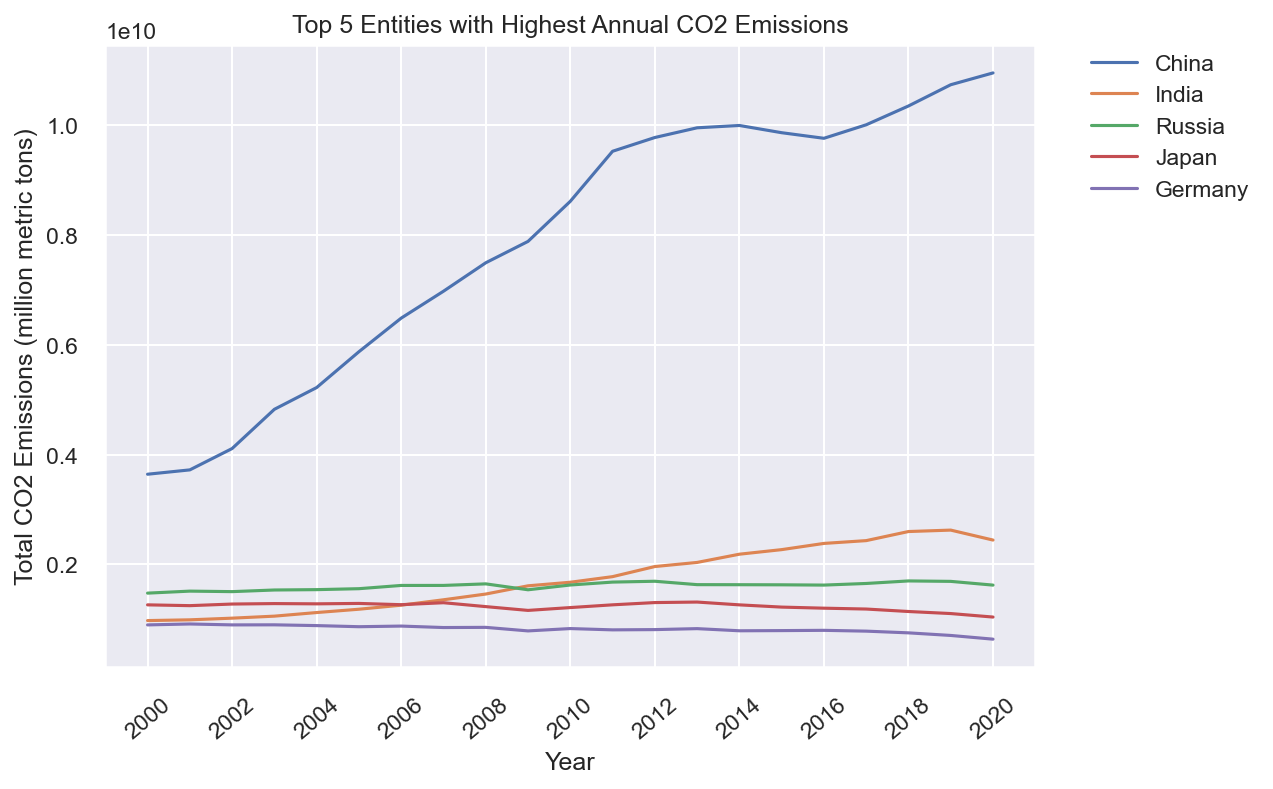

In [59]:
new_df5 = df3
new_df5 = new_df5[~new_df5['Entity'].str.contains('Asia|North America|United States|Europe')]
# Total for consume bad energies
new_df5['Total_non'] = new_df5['Gas Consumption - TWh (zero filled)'] + new_df5['Oil Consumption - TWh (zero filled)'] + new_df5['Coal Consumption - TWh (zero filled)']
# Total for produce bad energies 
new_df5['Total_non_produce'] = new_df5['Electricity from coal (TWh)'] + new_df5['Electricity from gas (TWh)'] + new_df5['Electricity from oil (TWh)']
# total for produce good energies
new_df5['Total_clean_produce'] = new_df5['Electricity from solar (TWh)'] + new_df5['Electricity from wind (TWh)'] + new_df5['Electricity from bioenergy (TWh)'] + new_df5['Electricity from hydro (TWh)']\
+new_df5['Electricity from nuclear (TWh)'] 



# assuming your dataframe is named 'new_df5'
new_df7 = new_df5.copy()

# drop rows where 'Code' is null
new_df7 = new_df7.dropna(subset=['Code'])

# drop 'world' entity
new_df7 = new_df7.drop(index=new_df7[new_df7['Entity']=='World'].index)

# group by 'Entity' and 'Year'
grouped = new_df7.groupby(['Entity', 'Year'])['Annual CO2 emissions'].sum()

# get the top 5 entities by total CO2 emissions
top_5 = grouped.groupby('Entity').sum().sort_values(ascending=False).head(5)

# plot a line graph for each entity in the top 5
for entity in top_5.index:
    data = grouped.loc[entity]
    plt.plot(data.index, data.values, label=entity)

# customize the plot
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (million metric tons)')
plt.title('Top 5 Entities with Highest Annual CO2 Emissions')
plt.xticks(np.arange(2000, 2021, 2),rotation=40)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

เนื่องจากบางประเทศมีขนาดที่ใหญ่ เราจึงลดความไบแอส โดยการพิจารณาข้อมูลการปล่อยก๊าซคาร์บอนไดออกไซด์ต่อจำนวนประชากร

ซึ่งจะแสดงออกมาเป็นกราฟแสดงการปล่อยก๊าซคาร์บอนไดออกไซด์ต่อจำนวนประชากรสูงสุด 5 ประเทศ

C:\Users\User\AppData\Local\Temp\ipykernel_13896\967849120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capita.drop(indexYear, inplace=True)


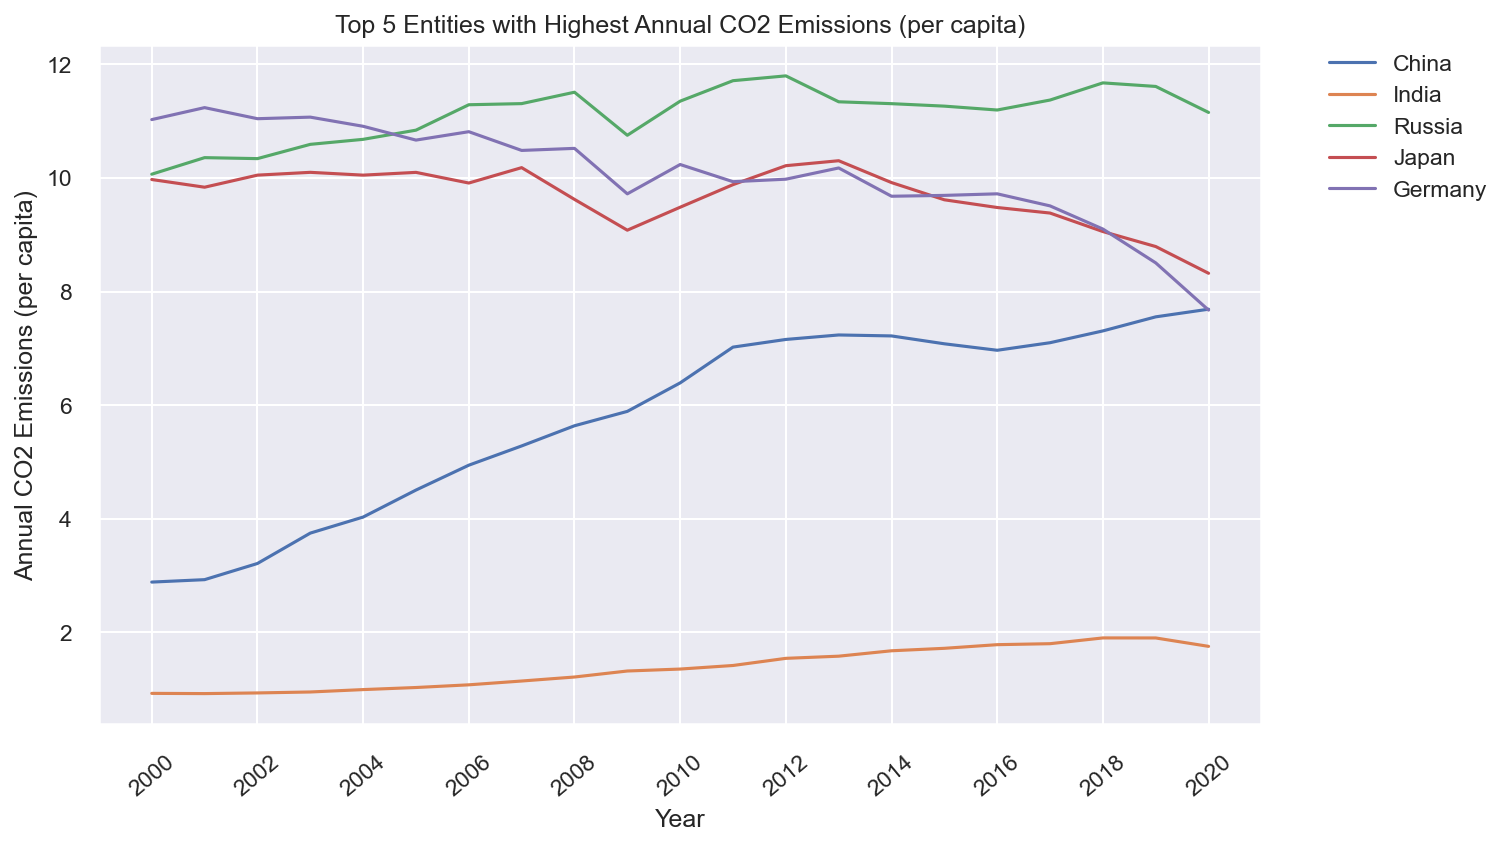

In [60]:
# Drop rows where 'Code' is null
df_co2_capita = pd.read_csv('https://raw.githubusercontent.com/Hellper1/DADS_5001_miniproject/main/dataset/co-emissions-per-capita.csv')
df_capita = df_co2_capita
df_capita = df_capita.dropna(subset=['Code'])

indexYear = df_capita[ (df_capita['Year'] < 2000) | (df_capita['Year'] > 2020)].index
df_capita.drop(indexYear, inplace=True)

# Group the data by entity and calculate the mean annual CO2 emissions (per capita)
grouped = df_capita.groupby(['Entity', 'Year'])['Annual CO2 emissions (per capita)'].mean()

# Select only the top 5 entities
entities = ['China', 'India', 'Russia', 'Japan', 'Germany']



top_entities = grouped.loc[entities]



# Plot the top 5 entities
fig, ax = plt.subplots(figsize=(10,6))
for entity in entities:
    ax.plot(top_entities.loc[entity].index, top_entities.loc[entity].values, label=entity)

#setup label    
ax.set_xlabel('Year')
ax.set_ylabel('Annual CO2 Emissions (per capita)')
ax.set_title('Top 5 Entities with Highest Annual CO2 Emissions (per capita)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(2000, 2021, 2),rotation=40)
plt.show()

non-renewable energy คือพลังงานไม่หมุนเวียนซึ่งเป็นพลังงานที่ปล่อยก๊าซคาร์บอนไดออกไซด์

renewable energy เป็นพลังงานหมุนเวียน หรือพลังงานสะอาดเป็นพลังงานไม่ก่อให้เกิดผลกระทบต่อสิ่งแวดล้อม

จึงพิจารณาสัดส่วนการใช้พลังงาน non-renewable energy VS renewable energy

C:\Users\User\AppData\Local\Temp\ipykernel_13896\2580748992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy3['total'] = df_energy3['co2_en'] + df_energy3['clean_en']
C:\Users\User\AppData\Local\Temp\ipykernel_13896\2580748992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy3['p_co2_en'] = df_energy3['co2_en']/df_energy3['total']
C:\Users\User\AppData\Local\Temp\ipykernel_13896\2580748992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

(-0.5, 26.2)

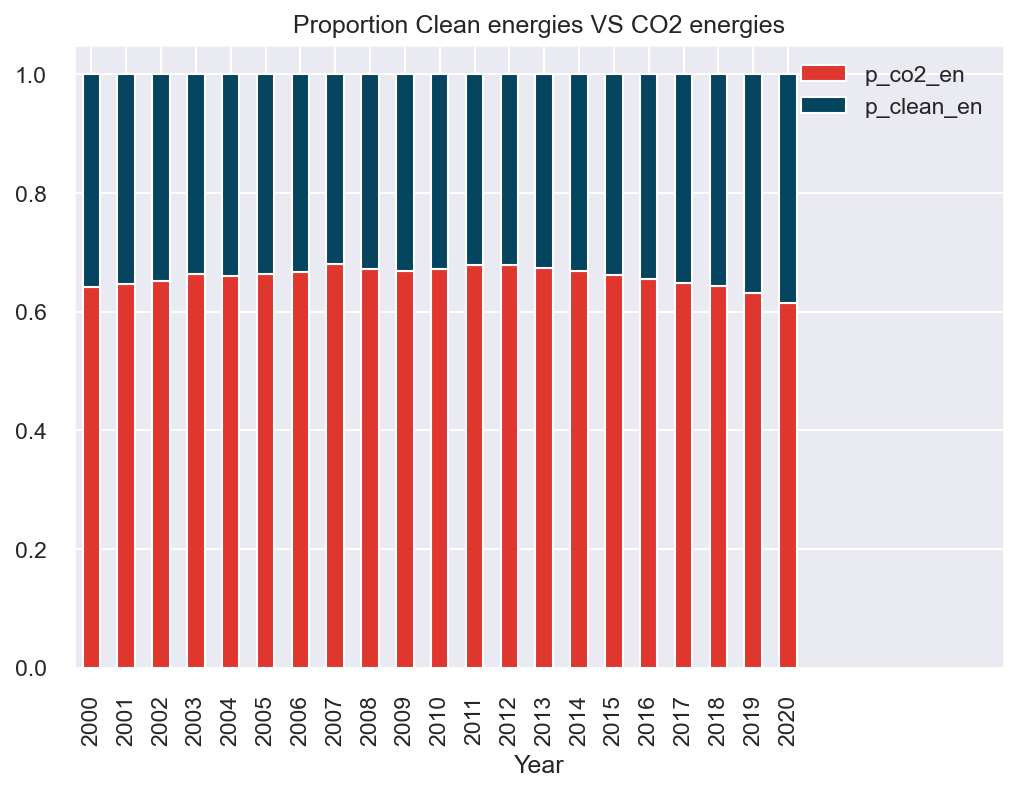

In [61]:
#calculate data
df_energy3 = df_energy2[['Year','co2_en','clean_en']]
df_energy3['total'] = df_energy3['co2_en'] + df_energy3['clean_en']
df_energy3['p_co2_en'] = df_energy3['co2_en']/df_energy3['total']
df_energy3['p_clean_en'] = df_energy3['clean_en']/df_energy3['total']

df_energy4 = df_energy3[['Year','p_co2_en','p_clean_en']]

# plt.figure(figsize=(15,10),dpi=150)
my_color = ['#DF362D','#05445E']
ax = plt.gca()

df_energy4.plot( x = 'Year',kind='bar',color=my_color, ax=ax,
         stacked=True,                 # default:stacked=False
         title='Proportion Clean energies VS CO2 energies' )

left, right = ax.get_xlim()    # Get the current left and right limits
ax.set_xlim(left, right+5.7)

In [62]:
# create propotion graph fro consumption (World only)
df_cw =  df_consumption[(df_consumption['Entity'] == 'World') & (df_consumption['Year'].between(2000, 2020))]
df_cw5 =df_cw
# Total
df_cw5['Total'] =df_cw5['Coal Consumption - TWh (zero filled)'] + df_cw5['Oil Consumption - TWh (zero filled)'] \
+ df_cw5['Gas Consumption - TWh (zero filled)'] + df_cw['Nuclear Consumption - TWh (zero filled)']\
+ df_cw5['Hydro Consumption - TWh (zero filled)']\
+ df_cw5['Wind Consumption - TWh (zero filled)']\
+ df_cw5['Solar Consumption - TWh (zero filled)']\
+ df_cw5['Biofuels Consumption - TWh - Total (zero filled)']\
+ df_cw5['Geo Biomass Other - TWh (zero filled)']

# create prop cols 
df_cw5['P_Geobio'] = df_cw5['Geo Biomass Other - TWh (zero filled)']
df_cw5['P_Bio'] = df_cw5['Biofuels Consumption - TWh - Total (zero filled)']
df_cw5['P_Solar'] = df_cw5['Solar Consumption - TWh (zero filled)']
df_cw5['P_Wind'] = df_cw5['Wind Consumption - TWh (zero filled)']
df_cw5['P_Hydro'] = df_cw5['Hydro Consumption - TWh (zero filled)']
df_cw5['P_nuclear'] = df_cw5['Nuclear Consumption - TWh (zero filled)']
df_cw5['P_Gas'] = df_cw5['Gas Consumption - TWh (zero filled)']
df_cw5['P_Coal'] = df_cw5['Coal Consumption - TWh (zero filled)']
df_cw5['P_Oil'] = df_cw5['Oil Consumption - TWh (zero filled)']
# divide by total col
df_cw5.iloc[:, 12:] = df_cw5.iloc[:, 12:].div(df_cw5["Total"], axis=0)



# df for plot
df_for_plt_con = df_cw5.iloc[:, [2] + list(range(13, 22))]

# To reorder the colunms
# Calculate the mean of each column
col_means = df_for_plt_con.mean()

# Sort the column means in descending order
col_order = col_means.sort_values(ascending=False).index.tolist()

# Reorder the columns in the dataframe
df_for_plt_con = df_for_plt_con[col_order]

C:\Users\User\AppData\Local\Temp\ipykernel_13896\1231099390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cw5['Total'] =df_cw5['Coal Consumption - TWh (zero filled)'] + df_cw5['Oil Consumption - TWh (zero filled)'] \
C:\Users\User\AppData\Local\Temp\ipykernel_13896\1231099390.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cw5['P_Geobio'] = df_cw5['Geo Biomass Other - TWh (zero filled)']
C:\Users\User\AppData\Local\Temp\ipykernel_13896\1231099390.py:15: SettingWithCopyWarning: 
A value is t

กราฟแสดงเทรนการใช้พลังงาน

หากเรามาดูที่สัดส่วนการผลิตพลังงานต่างที่เอามาใช้ในชีวิตประจำวันของพวกเรา จะเห็นได้ว่าสัดส่วนที่เป็นพลังงานที่เอามาใช้ส่วนใหญ่เป็นพลังงานไม่หมุนเวียนซึ่งเป็นพลังที่ปล่อยคาร์บอนออกมามากที่สุดนั่นเอง

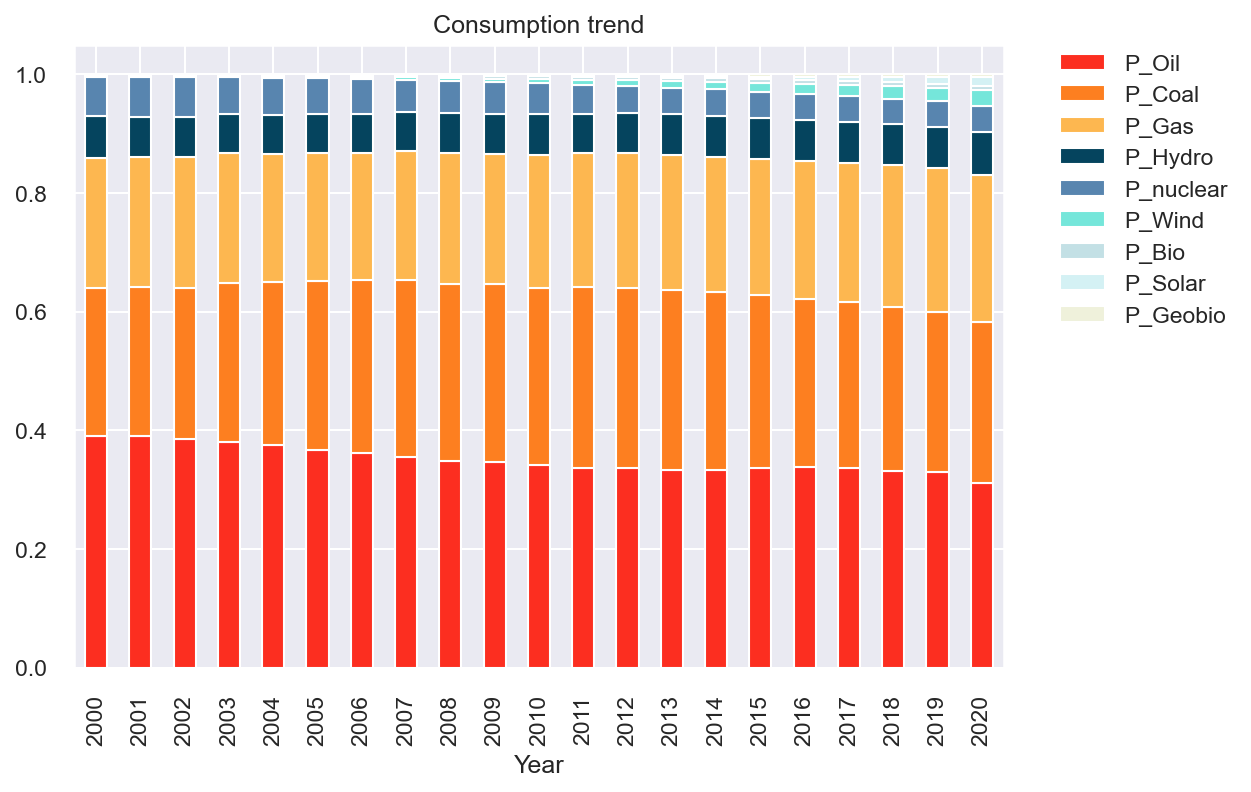

In [63]:
# Plot graph for consumption
my_color = ['#FC2E20','#FD7F20','#FDB750','#05445E','#5885AF','#75E6DA','#C3E0E5','#D4F1F4','#EFF1DB']
ax = plt.gca()


df_for_plt_con.plot( x = 'Year',kind='bar', ax=ax,
        stacked=True,color=my_color,                 # default:stacked=False
        title='Consumption trend')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

กราฟแสดงการผลิตพลังงานหมุนเวียนสูงสุด 5 อันดับ

C:\Users\User\AppData\Local\Temp\ipykernel_13896\1988300452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df5['Total_non'] = new_df5['Gas Consumption - TWh (zero filled)'] + new_df5['Oil Consumption - TWh (zero filled)'] + new_df5['Coal Consumption - TWh (zero filled)']
C:\Users\User\AppData\Local\Temp\ipykernel_13896\1988300452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df5['Total_non_produce'] = new_df5['Electricity from coal (TWh)'] + new_df5['Electricity from gas (TWh)'] + new_df5

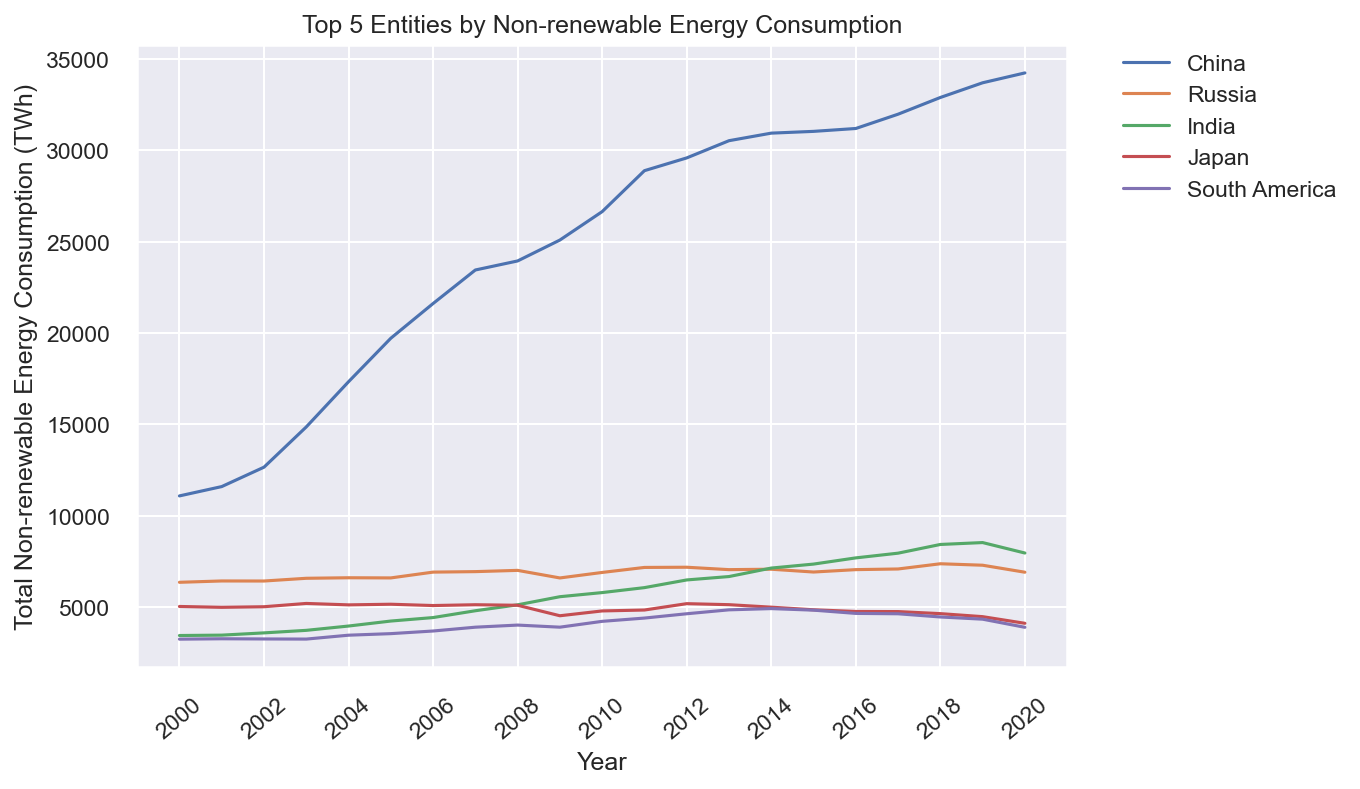

In [64]:
new_df5 = df3
new_df5 = new_df5[~new_df5['Entity'].str.contains('Asia|North America|United States|Europe')]
# Total for consume bad energies
new_df5['Total_non'] = new_df5['Gas Consumption - TWh (zero filled)'] + new_df5['Oil Consumption - TWh (zero filled)'] + new_df5['Coal Consumption - TWh (zero filled)']
# Total for produce bad energies 
new_df5['Total_non_produce'] = new_df5['Electricity from coal (TWh)'] + new_df5['Electricity from gas (TWh)'] + new_df5['Electricity from oil (TWh)']
# total for produce good energies
new_df5['Total_clean_produce'] = new_df5['Electricity from solar (TWh)'] + new_df5['Electricity from wind (TWh)'] + new_df5['Electricity from bioenergy (TWh)'] + new_df5['Electricity from hydro (TWh)']\
+new_df5['Electricity from nuclear (TWh)'] 



# Top 5 consume  non-renewable

ax = plt.gca()
grouped = new_df5.groupby('Entity')['Total_non'].sum().reset_index()

# Sort the data by total non-renewable energy consumption in descending order
grouped = grouped.sort_values('Total_non', ascending=False)

# Select the top five entities based on total non-renewable energy consumption
top_five = grouped.head(5)['Entity'].tolist()

# Create a line graph for each of the top five entities
for entity in top_five:
    entity_data = new_df5[new_df5['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Total_non'], label=entity)

# Add labels and title to the graph
plt.xlabel('Year')
plt.ylabel('Total Non-renewable Energy Consumption (TWh)')
plt.title('Top 5 Entities by Non-renewable Energy Consumption')
plt.xticks(np.arange(2000, 2021, 2),rotation=40)

# Add a legend to the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the graph
plt.show()

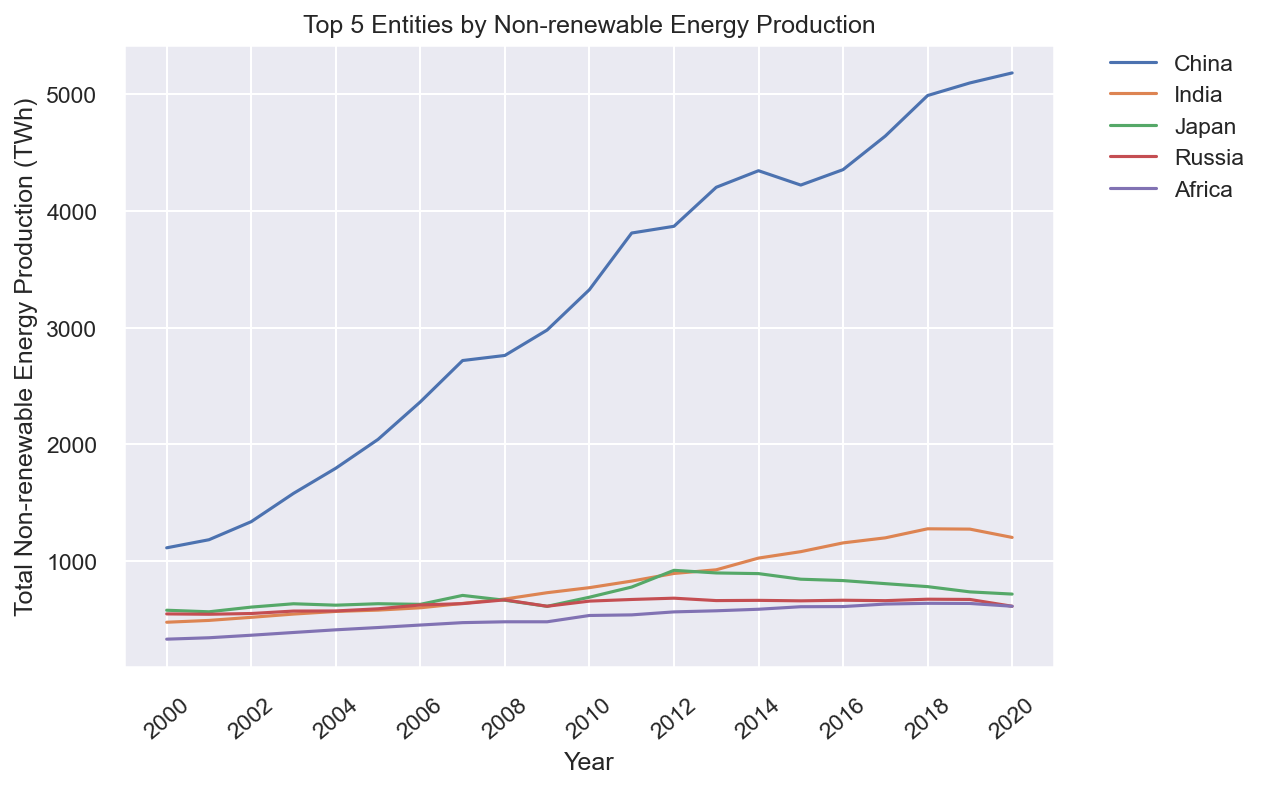

In [65]:
# Top 5 production  non-renewable

grouped = new_df5.groupby('Entity')['Total_non_produce'].sum().reset_index()

# Sort the data by total non-renewable energy consumption in descending order
grouped = grouped.sort_values('Total_non_produce', ascending=False)

# Select the top five entities based on total non-renewable energy consumption
top_five = grouped.head(5)['Entity'].tolist()

# Create a line graph for each of the top five entities
for entity in top_five:
    entity_data = new_df5[new_df5['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Total_non_produce'], label=entity)

# Add labels and title to the graph
plt.xlabel('Year')
plt.ylabel('Total Non-renewable Energy Production (TWh)')
plt.title('Top 5 Entities by Non-renewable Energy Production')
plt.xticks(np.arange(2000, 2021, 2),rotation=40)

# Add a legend to the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the graph
plt.show()

กราฟแสดงสัดส่วนการใช้พลังงานหมุนเวียน

C:\Users\User\AppData\Local\Temp\ipykernel_13896\1449330007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy6['Total'] =df_energy6['Electricity from nuclear (TWh)'] + df_energy6['Electricity from hydro (TWh)'] + df_energy6['Electricity from solar (TWh)'] + df_energy6['Electricity from wind (TWh)'] + df_energy6['Electricity from bioenergy (TWh)'] + df_energy6['Other renewables excluding bioenergy (TWh)']
C:\Users\User\AppData\Local\Temp\ipykernel_13896\1449330007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

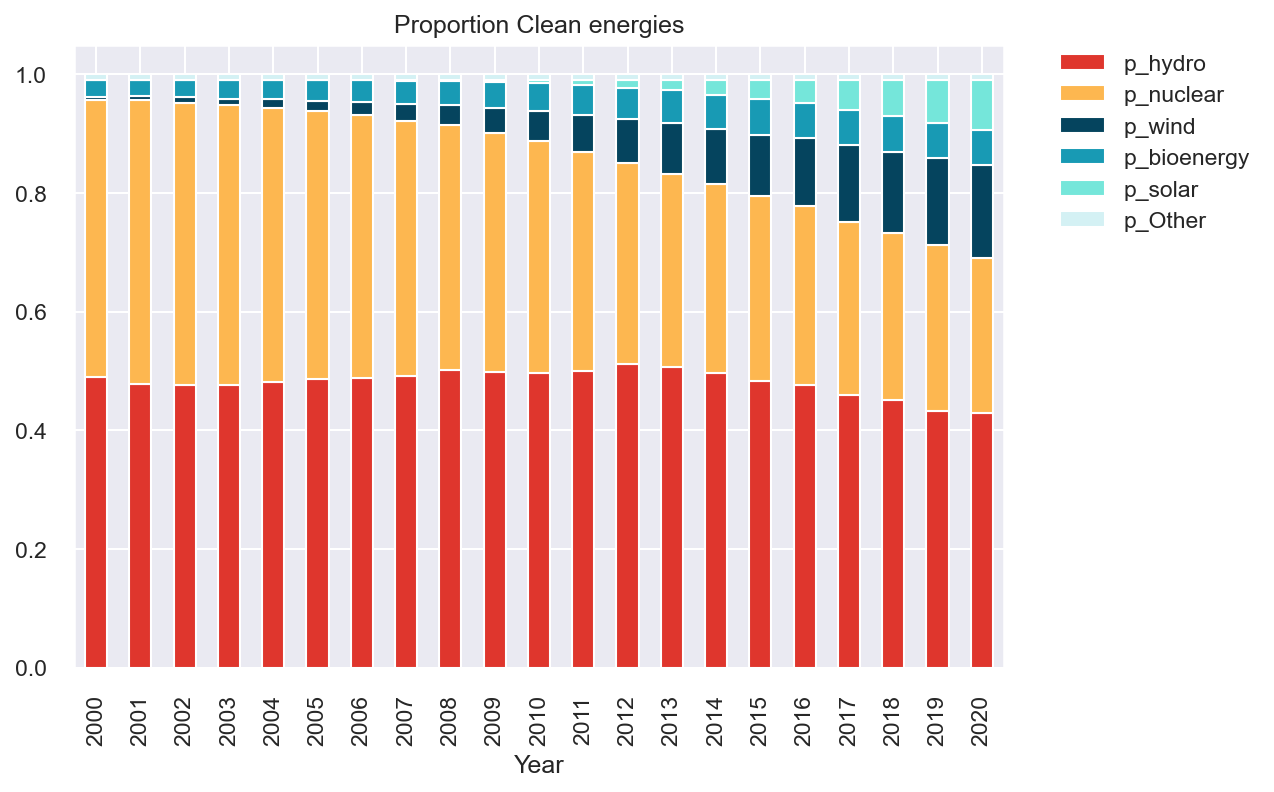

In [66]:
# พลังงานสะอาดอย่างเดียว
df_energy6 = df_energy2[['Year','Electricity from nuclear (TWh)'
                        ,'Electricity from hydro (TWh)','Electricity from solar (TWh)','Electricity from wind (TWh)','Electricity from bioenergy (TWh)'
                        ,'Other renewables excluding bioenergy (TWh)']]
df_energy6['Total'] =df_energy6['Electricity from nuclear (TWh)'] + df_energy6['Electricity from hydro (TWh)'] + df_energy6['Electricity from solar (TWh)'] + df_energy6['Electricity from wind (TWh)'] + df_energy6['Electricity from bioenergy (TWh)'] + df_energy6['Other renewables excluding bioenergy (TWh)']
df_energy6


df_energy6['p_nuclear'] = df_energy6['Electricity from nuclear (TWh)']/df_energy6['Total']
df_energy6['p_hydro'] = df_energy6['Electricity from hydro (TWh)']/df_energy6['Total']
df_energy6['p_solar'] = df_energy6['Electricity from solar (TWh)']/df_energy6['Total']

df_energy6['p_wind'] = df_energy6['Electricity from wind (TWh)']/df_energy6['Total']
df_energy6['p_bioenergy'] = df_energy6['Electricity from bioenergy (TWh)']/df_energy6['Total']
df_energy6['p_Other'] = df_energy6['Other renewables excluding bioenergy (TWh)']/df_energy6['Total']
df_energy6

df_clean1 =df_energy6.loc[:, ('p_nuclear', 'p_hydro','p_solar','p_wind','p_bioenergy','p_Other')].div(df_energy6['Total'], axis=0)
# Calculate the mean of each column
col_means2 = df_clean1.mean()

# Sort the column means in descending order
col_order2 = col_means2.sort_values(ascending=False).index.tolist()
# Reorder the columns in the dataframe
df_clean1 = df_clean1[col_order2]

# Plot the proportion of clean energy
df_clean_for_plt = df_energy6.loc[:, ('Year','p_nuclear', 'p_hydro','p_wind','p_solar','p_bioenergy','p_Other')]

# Calculate the mean of each column
col_means2 = df_clean_for_plt.mean()

# Sort the column means in descending order
col_order2 = col_means2.sort_values(ascending=False).index.tolist()
# Reorder the columns in the dataframe
df_clean_for_plt = df_clean_for_plt[col_order2]
my_color = ['#DF362D','#FDB750','#05445E','#189AB4','#75E6DA','#D4F1F4']
ax = plt.gca()

df_clean_for_plt.plot( x = 'Year',kind='bar', ax=ax,
         stacked=True,color=my_color,                 # default:stacked=False
         title='Proportion Clean energies' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

กราฟแสดงการผลิตพลังงานหมุนเวียนสูงสุด 5 อันดับ

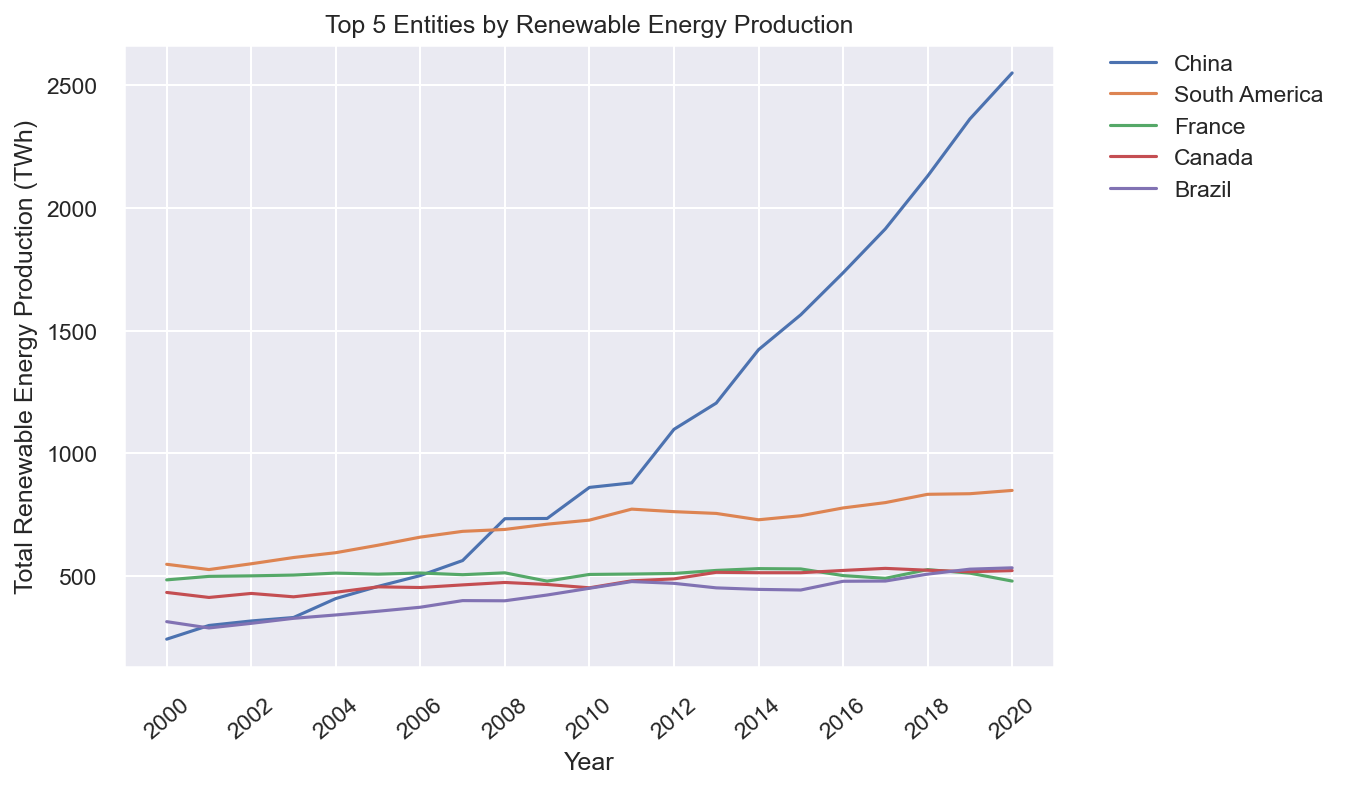

In [67]:
# Top 5 production renewable

grouped = new_df5.groupby('Entity')['Total_clean_produce'].sum().reset_index()

# Sort the data by total non-renewable energy consumption in descending order
grouped = grouped.sort_values('Total_clean_produce', ascending=False)

# Select the top five entities based on total non-renewable energy consumption
top_five = grouped.head(5)['Entity'].tolist()

# Create a line graph for each of the top five entities
for entity in top_five:
    entity_data = new_df5[new_df5['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Total_clean_produce'], label=entity)

# Add labels and title to the graph
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Production (TWh)')
plt.title('Top 5 Entities by Renewable Energy Production')
plt.xticks(np.arange(2000, 2021, 2),rotation=40)

# Add a legend to the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the graph
plt.show()

กราฟเป้าหมายการลดอุณหภูมิโลก โดยการลดการปล่อยก๊าซคาร์บอนไดออกไซด์

C:\Users\User\AppData\Local\Temp\ipykernel_13896\3185098805.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(f"{((target_emissions - new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0]) / new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0])*100:.1f}% change towards Target (1.5C)",
C:\Users\User\AppData\Local\Temp\ipykernel_13896\3185098805.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(f"{((target_emissions2 - new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0]) / new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0])*100:.1f}% change towards Target (2C)",


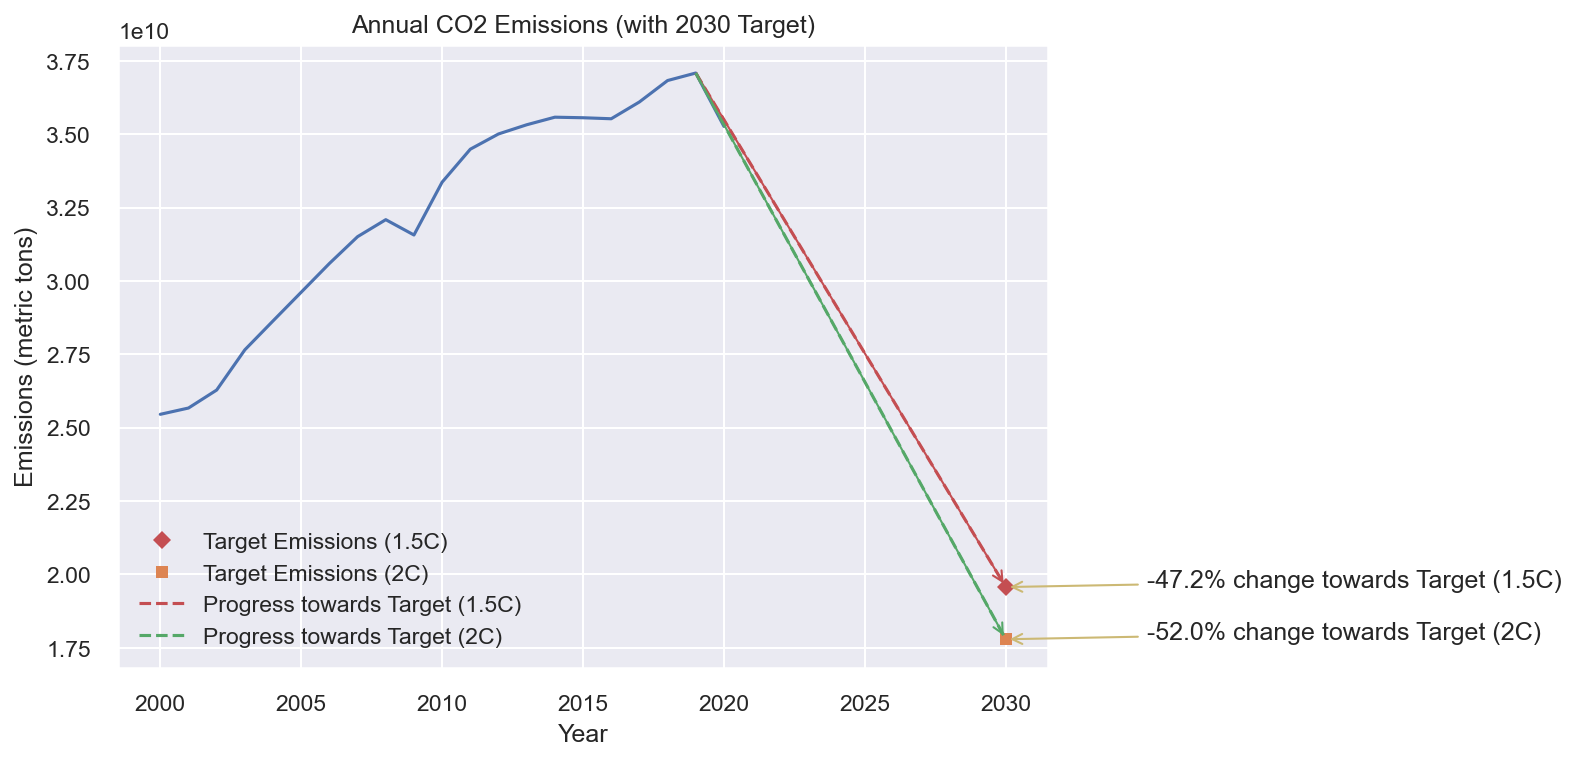

In [68]:
# Fliter Entity = 'World'
new_df6 =  df
new_df6 = new_df6[new_df6['Entity'].str.contains('World', case=False)]

# Check if the filtered DataFrame is empty
years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]

if new_df6.empty:
    print("No data found for 'World' entity")
else:
    # Plot the CO2 emission trend
    plt.plot(new_df6['Year'], new_df6['Annual CO2 emissions'])
    plt.title('Annual CO2 Emissions')
    plt.xlabel('Year')
    plt.ylabel('Emissions (metric tons)')

    # Calculate the emission target for 2030 (1.5C)
    target_emissions = new_df6.loc[new_df6['Year'] == 2014, 'Annual CO2 emissions'].values[0] * 0.55

    # Calculate the emission target for 2030 (2C)
    target_emissions2 = new_df6.loc[new_df6['Year'] == 2014, 'Annual CO2 emissions'].values[0] * 0.50

    # Add the target line to the plot (1.5C)
    plt.plot([2030], [target_emissions], 'rD', label='Target Emissions (1.5C)')

    # Add the target line to the plot (2C)
    plt.plot([2030], [target_emissions2],'s', label='Target Emissions (2C)')

    # Add a dotted line to connect the actual and target lines (1.5C)
    plt.plot([2019, 2030], [new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0], target_emissions], 'r--', label='Progress towards Target (1.5C)')

    # Add an arrow to the dotted line indicating progress towards target (1.5C)
    plt.annotate("", xy=(2030, target_emissions), xytext=(2019, new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0]),
                arrowprops=dict(arrowstyle='->', color='r'))

    # Add a dotted line to connect the actual and target lines (2C)
    plt.plot([2019, 2030], [new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0], target_emissions2], 'g--', label='Progress towards Target (2C)')

    # Add an arrow to the dotted line indicating progress towards target (2C)
    plt.annotate("", xy=(2030, target_emissions2), xytext=(2019, new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0]),
                arrowprops=dict(arrowstyle='->', color='g'))
    # Add an arrow annotation to the plot
    plt.annotate(f"{((target_emissions - new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0]) / new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0])*100:.1f}% change towards Target (1.5C)", 
                xy=(2030, target_emissions), xytext=(2035, target_emissions + 2000),
                arrowprops=dict(facecolor='black', arrowstyle="->", color = 'y'))
    # Add an arrow annotation to the plot
    plt.annotate(f"{((target_emissions2 - new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0]) / new_df6.loc[new_df6['Year'] == 2019, 'Annual CO2 emissions'].values[0])*100:.1f}% change towards Target (2C)", 
                xy=(2030, target_emissions2), xytext=(2035, target_emissions2 + 2000),
                arrowprops=dict(facecolor='black', arrowstyle="->", color = 'y'))

    # Update the legend and title
    plt.legend()
    plt.title('Annual CO2 Emissions (with 2030 Target)')
    plt.show()